- compare-model-accuracy
    - x축
        - 곱셈 추천 방법?
    - y축
        - accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 테스트 데이터
# df = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/dataset/spmm-latency-dataset/extract-dataset-using-d-optimal/dataset/nonsquare-test-258-from-spmm-contain-todense-over-3s-1293.csv')
df = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/dataset/3.spmm-dataset/dataset/spmm-over-3s/nonsquare-test-258-from-spmm-contain-todense-over-3s-1293.csv')

# 테스트 데이터를 row 단위로 읽으며, sp_smdm 과 bz_smsm 중 빠른 label 저장
real_label = []

for i in range(len(df)):
    latency_list = []
    latency_list.append(df.loc[i,'sp_smdm'])
    latency_list.append(df.loc[i,'bz_smsm'])
    real_label.append(latency_list.index(min(latency_list)))

In [2]:
# 테스트 데이터 길이만큼, bz_smsm 이 빠르다고 저장
pred_label = np.ones(len(real_label))

# pred_label 과 real_label 간 분류 정확도 계산
print(accuracy_score(real_label, pred_label))

0.5


In [3]:
# 테스트 데이터 길이만큼, sp_smdm 이 빠르다고 저장
pred_label = np.zeros(len(real_label))

# pred_label 과 real_label 간 분류 정확도 계산
print(accuracy_score(real_label, pred_label))

0.5


In [4]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # only sparse accuracy 성능
# only_sparse_accuracy = [0.44]
# only_sparse_accuracy_min = [0.44]
# only_sparse_accuracy_max = [0.44]
# df = pd.DataFrame({'x_label':"Yet",'only_sparse_accuracy':only_sparse_accuracy, 'only_sparse_accuracy_min': only_sparse_accuracy_min, 'only_sparse_accuracy_max': only_sparse_accuracy_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.only_sparse_accuracy - df.only_sparse_accuracy_min
# df['maxgap'] = df.only_sparse_accuracy_max - df.only_sparse_accuracy
# only_sparse_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # only dense accuracy 성능
# only_dense_accuracy = [0.55]
# only_dense_accuracy_min = [0.55]
# only_dense_accuracy_max = [0.55]
# df = pd.DataFrame({'x_label':"Yet",'only_dense_accuracy':only_dense_accuracy, 'only_dense_accuracy_min': only_dense_accuracy_min, 'only_dense_accuracy_max': only_dense_accuracy_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.only_dense_accuracy - df.only_dense_accuracy_min
# df['maxgap'] = df.only_dense_accuracy_max - df.only_dense_accuracy
# only_dense_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # Naive accuracy 성능
# Naive_accuracy = [0.73]
# Naive_accuracy_min = [0.73]
# Naive_accuracy_max = [0.73]
# df = pd.DataFrame({'x_label':"Naive",'Naive_accuracy':Naive_accuracy, 'Naive_accuracy_min': Naive_accuracy_min, 'Naive_accuracy_max': Naive_accuracy_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.Naive_accuracy - df.Naive_accuracy_min
# df['maxgap'] = df.Naive_accuracy_max - df.Naive_accuracy
# Naive_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # # XGBoost accuracy 성능
# # XGBoost_accuracy = [0.90]
# # XGBoost_accuracy_min = [0.90]
# # XGBoost_accuracy_max = [0.90]
# # df = pd.DataFrame({'x_label':"XGBoost",'XGBoost_accuracy':XGBoost_accuracy, 'XGBoost_accuracy_min': XGBoost_accuracy_min, 'XGBoost_accuracy_max': XGBoost_accuracy_max}) 

# # # 평균과 최소, 최대 간의 차이
# # df['mingap'] = df.XGBoost_accuracy - df.XGBoost_accuracy_min
# # df['maxgap'] = df.XGBoost_accuracy_max - df.XGBoost_accuracy
# # XGBoost_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # DNN accuracy 성능
# DNN_accuracy = [0.95]
# DNN_accuracy_min = [0.95]
# DNN_accuracy_max = [0.95]
# df = pd.DataFrame({'x_label':"DNN",'DNN_accuracy':DNN_accuracy, 'DNN_accuracy_min': DNN_accuracy_min, 'DNN_accuracy_max': DNN_accuracy_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.DNN_accuracy - df.DNN_accuracy_min
# df['maxgap'] = df.DNN_accuracy_max - df.DNN_accuracy
# DNN_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# ################################# x축 및 전체 figure 설정 ####################################################

# fontsize = 30

# plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=fontsize*0.9)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=fontsize*0.9)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=fontsize*0.45)  # 범례 폰트 크기
# plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

# #x = np.array([0, 1, 2]) # x축 인덱스
# width = 0.6 # bar 넓이

# fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# # 각 bar 의 중심 지정
# bar1 = ax1.bar(0, only_sparse_accuracy, width, linewidth=2, edgecolor='black', yerr=only_sparse_yerr, hatch='.', color='lightslategrey', capsize=20)
# bar2 = ax1.bar(1, only_dense_accuracy, width, linewidth=2, edgecolor='black', yerr=only_dense_yerr, hatch='\\', color='lightsteelblue', capsize=20)
# bar3 = ax1.bar(2, Naive_accuracy, width, linewidth=2, edgecolor='black', yerr=Naive_yerr, hatch='/', color='cornflowerblue', capsize=20)
# # bar4 = ax1.bar(3, XGBoost_accuracy, width, linewidth=2, edgecolor='black', yerr=XGBoost_yerr, hatch='\\', color='cornflowerblue', capsize=20)
# bar4 = ax1.bar(3, DNN_accuracy, width, linewidth=2, edgecolor='black', yerr=DNN_yerr, hatch='|', color='royalblue', capsize=20)
# ################################# ax1 ####################################################

# ax1.set_xticks([0, 1, 2, 3]) # x축 tick 위치
# ax1.set_xticklabels(["OnlySparse", "OnlyDense", "StaticThreshold", "Proposed System"], rotation=10) # x축 tick label
# ax1.tick_params(axis='x',pad=15) # x축 tick label pad

# ax1.yaxis.grid(True) # y축만 grid 사용
# ax1.set_ylim([0.0, 1])  # 좌측 y축 범위 설정
# # ax1.set_yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]) # y축 index 설정

# #ax1.set_xlabel('Model', labelpad=20) # ax1 xlabel 설정
# ax1.set_ylabel('Accuracy', labelpad=30) # ax1 ylabel 설정

# #ax1.legend(loc="upper right") # 범례 표시

# # 이미지 저장시, figure 크기에 맞게 이미지 저장
# fig.tight_layout()
# fig.savefig('./compare-recommendation-method-accuracy.png')
# plt.show()

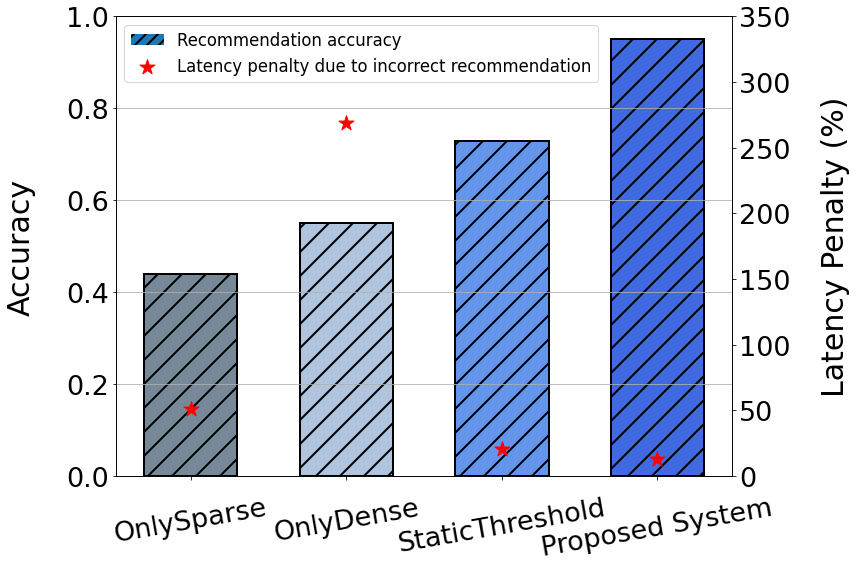

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# only sparse accuracy 성능
only_sparse_accuracy = [0.44]
only_sparse_accuracy_min = [0.44]
only_sparse_accuracy_max = [0.44]
df = pd.DataFrame({'x_label':"Yet",'only_sparse_accuracy':only_sparse_accuracy, 'only_sparse_accuracy_min': only_sparse_accuracy_min, 'only_sparse_accuracy_max': only_sparse_accuracy_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.only_sparse_accuracy - df.only_sparse_accuracy_min
df['maxgap'] = df.only_sparse_accuracy_max - df.only_sparse_accuracy
only_sparse_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# only dense accuracy 성능
only_dense_accuracy = [0.55]
only_dense_accuracy_min = [0.55]
only_dense_accuracy_max = [0.55]
df = pd.DataFrame({'x_label':"Yet",'only_dense_accuracy':only_dense_accuracy, 'only_dense_accuracy_min': only_dense_accuracy_min, 'only_dense_accuracy_max': only_dense_accuracy_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.only_dense_accuracy - df.only_dense_accuracy_min
df['maxgap'] = df.only_dense_accuracy_max - df.only_dense_accuracy
only_dense_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# Naive accuracy 성능
Naive_accuracy = [0.73]
Naive_accuracy_min = [0.73]
Naive_accuracy_max = [0.73]
df = pd.DataFrame({'x_label':"Naive",'Naive_accuracy':Naive_accuracy, 'Naive_accuracy_min': Naive_accuracy_min, 'Naive_accuracy_max': Naive_accuracy_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.Naive_accuracy - df.Naive_accuracy_min
df['maxgap'] = df.Naive_accuracy_max - df.Naive_accuracy
Naive_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # XGBoost accuracy 성능
# XGBoost_accuracy = [0.90]
# XGBoost_accuracy_min = [0.90]
# XGBoost_accuracy_max = [0.90]
# df = pd.DataFrame({'x_label':"XGBoost",'XGBoost_accuracy':XGBoost_accuracy, 'XGBoost_accuracy_min': XGBoost_accuracy_min, 'XGBoost_accuracy_max': XGBoost_accuracy_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.XGBoost_accuracy - df.XGBoost_accuracy_min
# df['maxgap'] = df.XGBoost_accuracy_max - df.XGBoost_accuracy
# XGBoost_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# DNN accuracy 성능
DNN_accuracy = [0.95]
DNN_accuracy_min = [0.95]
DNN_accuracy_max = [0.95]
df = pd.DataFrame({'x_label':"DNN",'DNN_accuracy':DNN_accuracy, 'DNN_accuracy_min': DNN_accuracy_min, 'DNN_accuracy_max': DNN_accuracy_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.DNN_accuracy - df.DNN_accuracy_min
df['maxgap'] = df.DNN_accuracy_max - df.DNN_accuracy
DNN_yerr = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 30

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize*0.9)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize*0.9)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.55)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

#x = np.array([0, 1, 2]) # x축 인덱스
width = 0.6 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(0, only_sparse_accuracy, width, label='Recommendation accuracy',hatch='//') 
bar1 = ax1.bar(0, only_sparse_accuracy, width, linewidth=2, edgecolor='black', yerr=only_sparse_yerr, hatch='/', color='lightslategrey', capsize=20) 
bar2 = ax1.bar(1, only_dense_accuracy, width, linewidth=2, edgecolor='black', yerr=only_dense_yerr, hatch='/', color='lightsteelblue', capsize=20)
bar3 = ax1.bar(2, Naive_accuracy, width, linewidth=2, edgecolor='black', yerr=Naive_yerr, hatch='/', color='cornflowerblue', capsize=20)
# bar4 = ax1.bar(3, XGBoost_accuracy, width, linewidth=2, edgecolor='black', yerr=XGBoost_yerr, hatch='\\', color='cornflowerblue', capsize=20)
bar4 = ax1.bar(3, DNN_accuracy, width, linewidth=2, edgecolor='black', yerr=DNN_yerr, hatch='/', color='royalblue', capsize=20) 
################################# ax1 ####################################################

ax1.set_xticks([0, 1, 2, 3]) # x축 tick 위치
ax1.set_xticklabels(["OnlySparse", "OnlyDense", "StaticThreshold", "Proposed System"], rotation=10) # x축 tick label
ax1.tick_params(axis='x',pad=15) # x축 tick label pad

##########################################################################################
ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0.0, 1])  # 좌측 y축 범위 설정

ax1.set_ylabel('Accuracy', labelpad=30) # ax1 ylabel 설정

############################################################################################

ax2 = ax1.twinx()
ax2.set_ylim([0, 350])  # 우측 y축 범위 설정
ax2.set_ylabel('Latency Penalty (%)', labelpad=30) # ax2 ylabel 설정

only_sparse_mape = [51.44]
only_dense_mape = [269.21]
static_mape = [20.69]
DNN_mape = [13.03]

scatter1 = ax2.scatter(0, only_sparse_mape, color='red', marker='*', s=250,label='Latency penalty due to incorrect recommendation')
scatter2 = ax2.scatter(1, only_dense_mape, color='red', marker='*', s=250)
scatter3 = ax2.scatter(2, static_mape, color='red', marker='*', s=250)
scatter4 = ax2.scatter(3, DNN_mape, color='red', marker='*', s=250)

# 바 이미지와 Label 저장
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 모든 legend 를 하나로 합쳐서 표현
ax2.legend(lines + lines2, labels + labels2, loc=2)

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('../pdf/compare-recommendation-method-accuracy.pdf')
plt.show()